In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
41,017 cases (7 day average) as of Tue 07 Dec, -58.0 since Mon 06 Dec
714 hospitalised (7 day average) as of Wed 08 Dec, +0.0 since Wed 08 Dec
95 died (7 day average) as of Tue 07 Dec, +1.7 since Mon 06 Dec


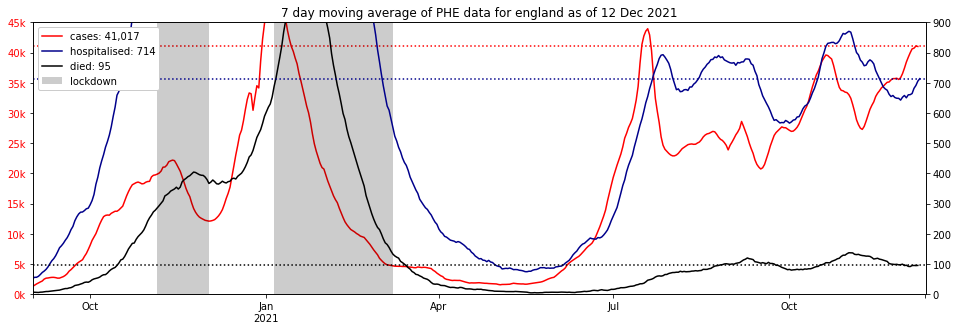

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

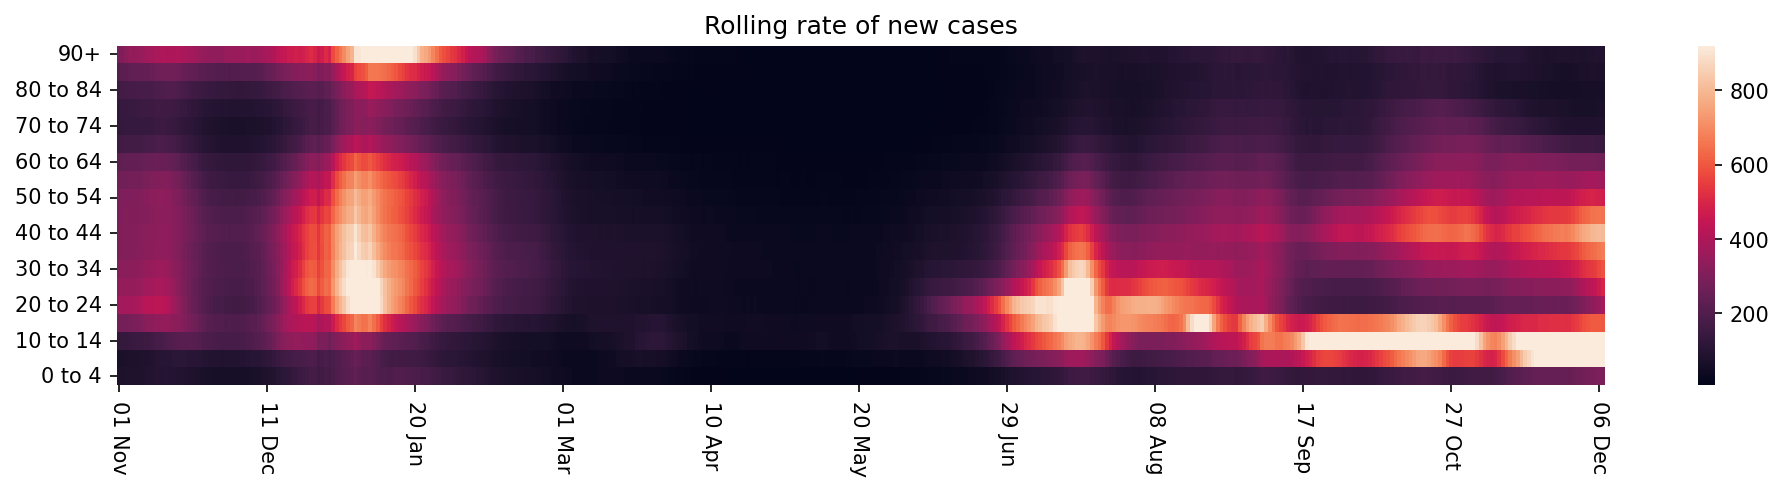

In [4]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2020-11')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

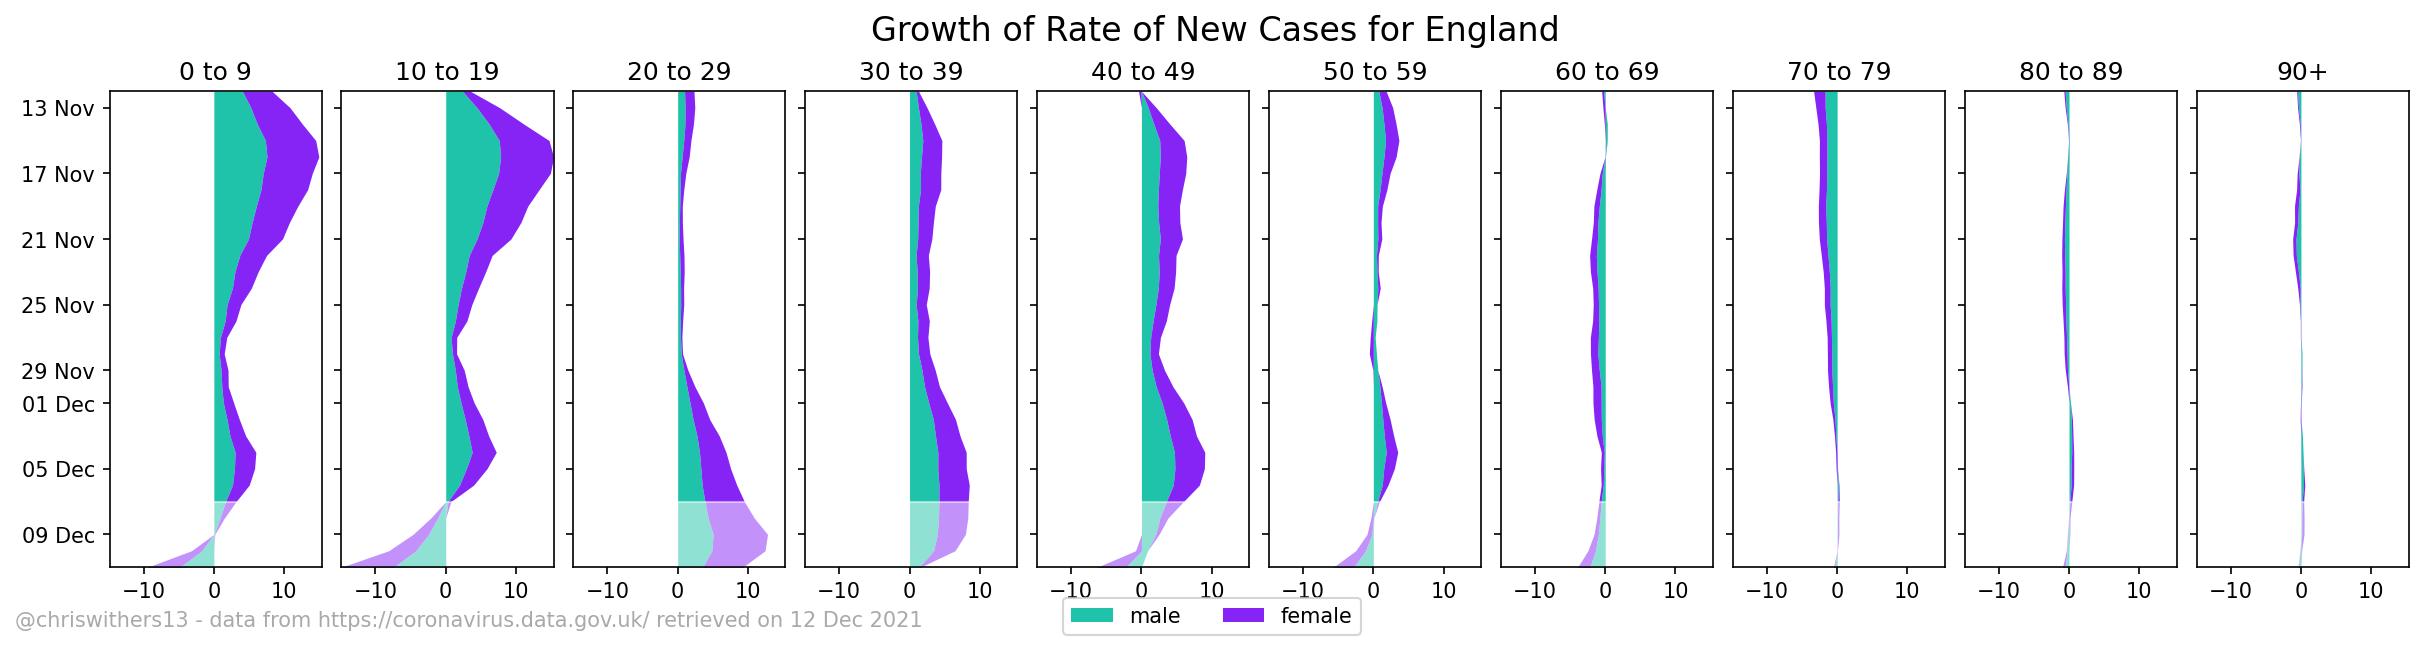

In [5]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

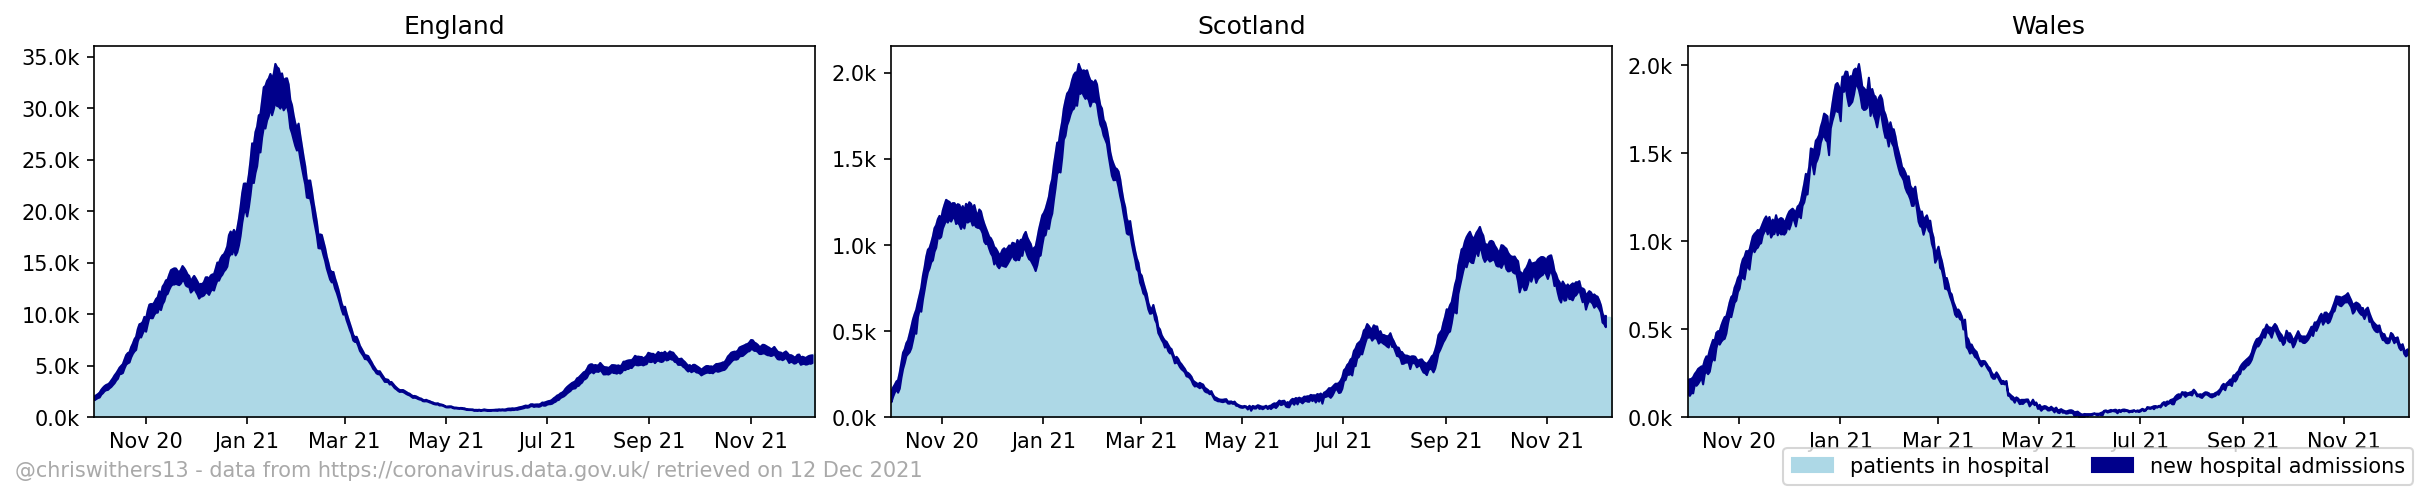

In [6]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

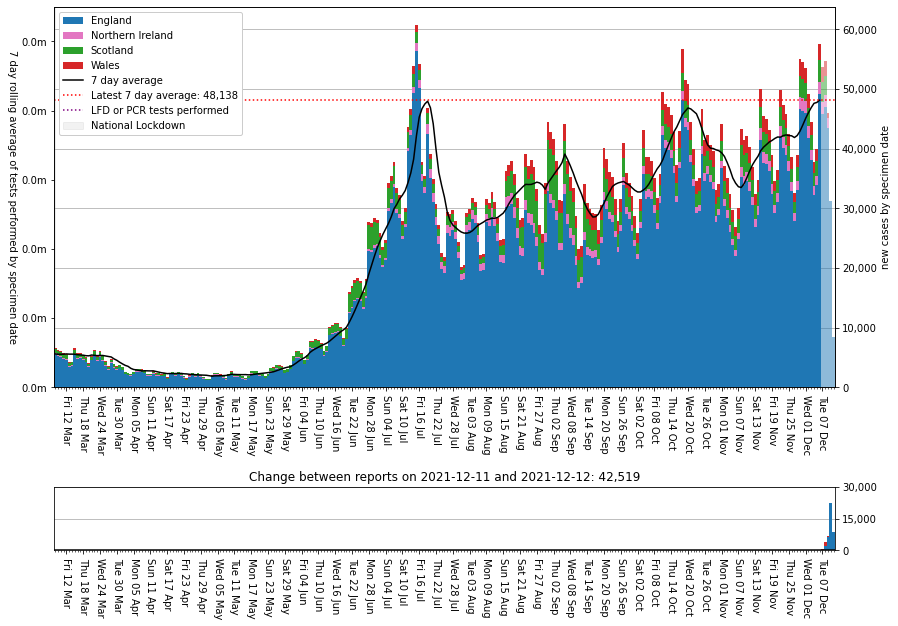

In [7]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

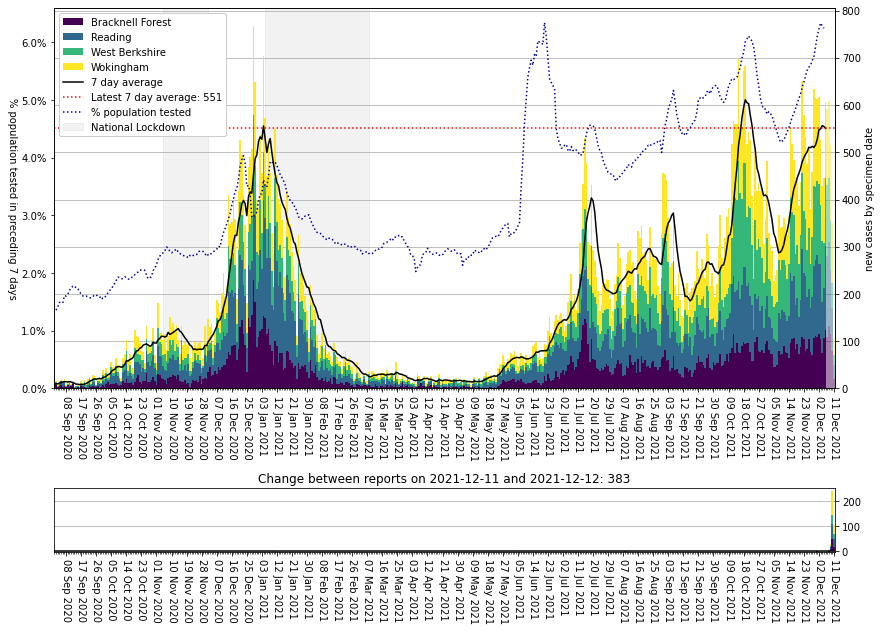

In [21]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested, earliest='2020-09')

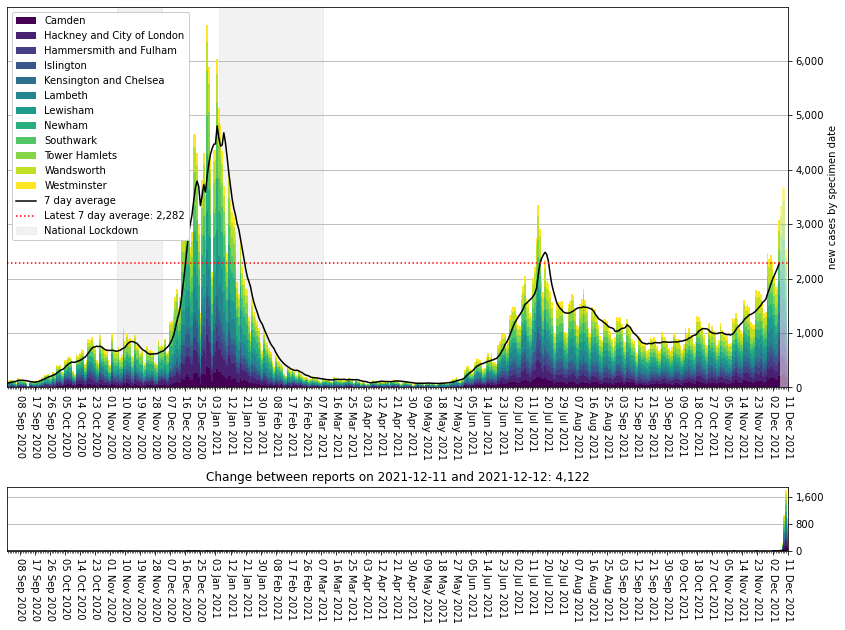

In [19]:
plot_areas(for_date, areas=london_areas, earliest='2020-09')

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                        
E06000026                Plymouth          795.879435                  2086.0   
E07000155  South Northamptonshire          792.676474                   749.0   
E07000044              South Hams          757.436440                   659.0   
E07000211    Reigate and Banstead          748.245355                  1113.0   
E07000107                Dartford          737.083282                   830.0   
E07000179       South Oxfordshire          736.324152                  1046.0   
E07000006             South Bucks          705.565020                   497.0   
E07000047              West Devon          695.390351                   388.0   
E06000034                Thurrock          693.468547                  1209.0   
E07000207               Elmbridge          689.352681                   943.0   

          Specimen date  
areaCode                 
E06000026    2021-12-11  
E07000155    2021-12-11  
E07000044    2021-12-11  
E07000211    2021-12-11  
E07000107    2021-12-11  
E07000179    2021-12-11  
E07000006    2021-12-11  
E07000047    2021-12-11  
E06000034    2021-12-11  
E07000207    2021-12-11

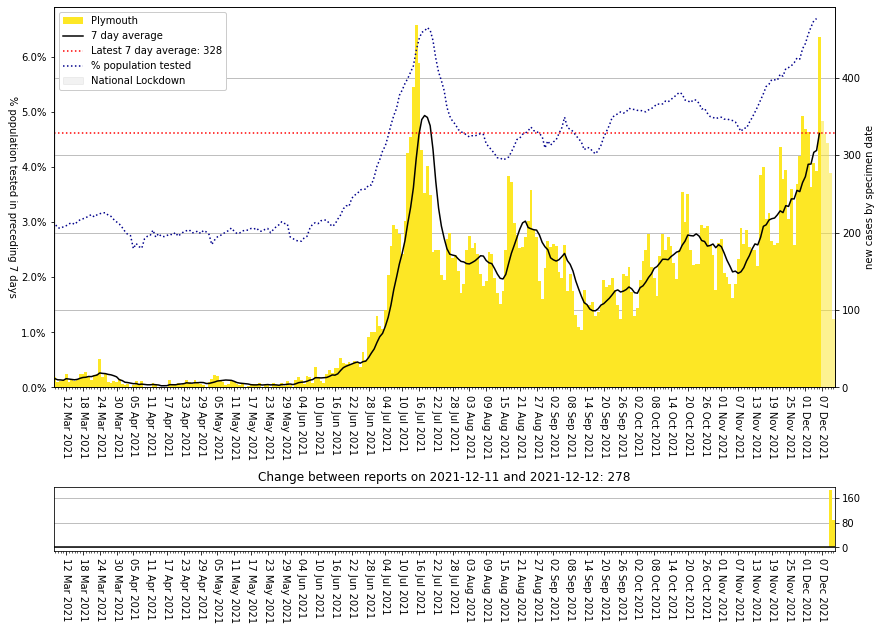

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                      
E08000025                    Birmingham          320.104115   
E06000052  Cornwall and Isles of Scilly          433.017023   
E08000035                         Leeds          295.912822   
E06000054                     Wiltshire          452.578276   
E09000028                     Southwark          674.967851   
E09000008                       Croydon          553.127667   
E08000003                    Manchester          386.536868   
E09000022                       Lambeth          653.612813   
E09000032                    Wandsworth          641.840347   
E06000026                      Plymouth          795.879435   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  3655.0    2021-12-11  
E06000052                  2476.0    2021-12-11  
E08000035                  2347.0    2021-12-11  
E06000054                  2263.0    2021-12-11  
E09000028                  2152.0    2021-12-11  
E09000008                  2139.0    2021-12-11  
E08000003                  2137.0    2021-12-11  
E09000022                  2131.0    2021-12-11  
E09000032                  2116.0    2021-12-11  
E06000026                  2086.0    2021-12-11

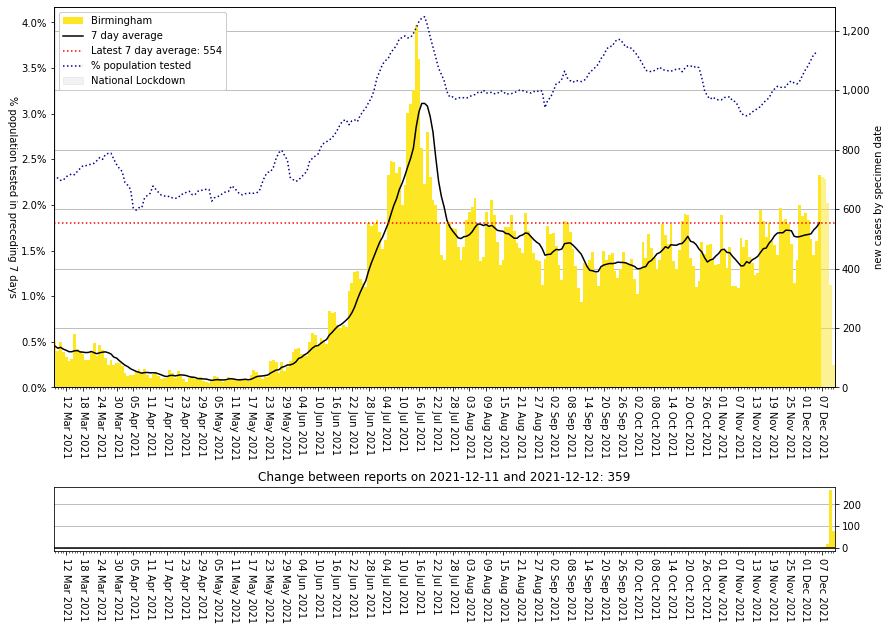

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

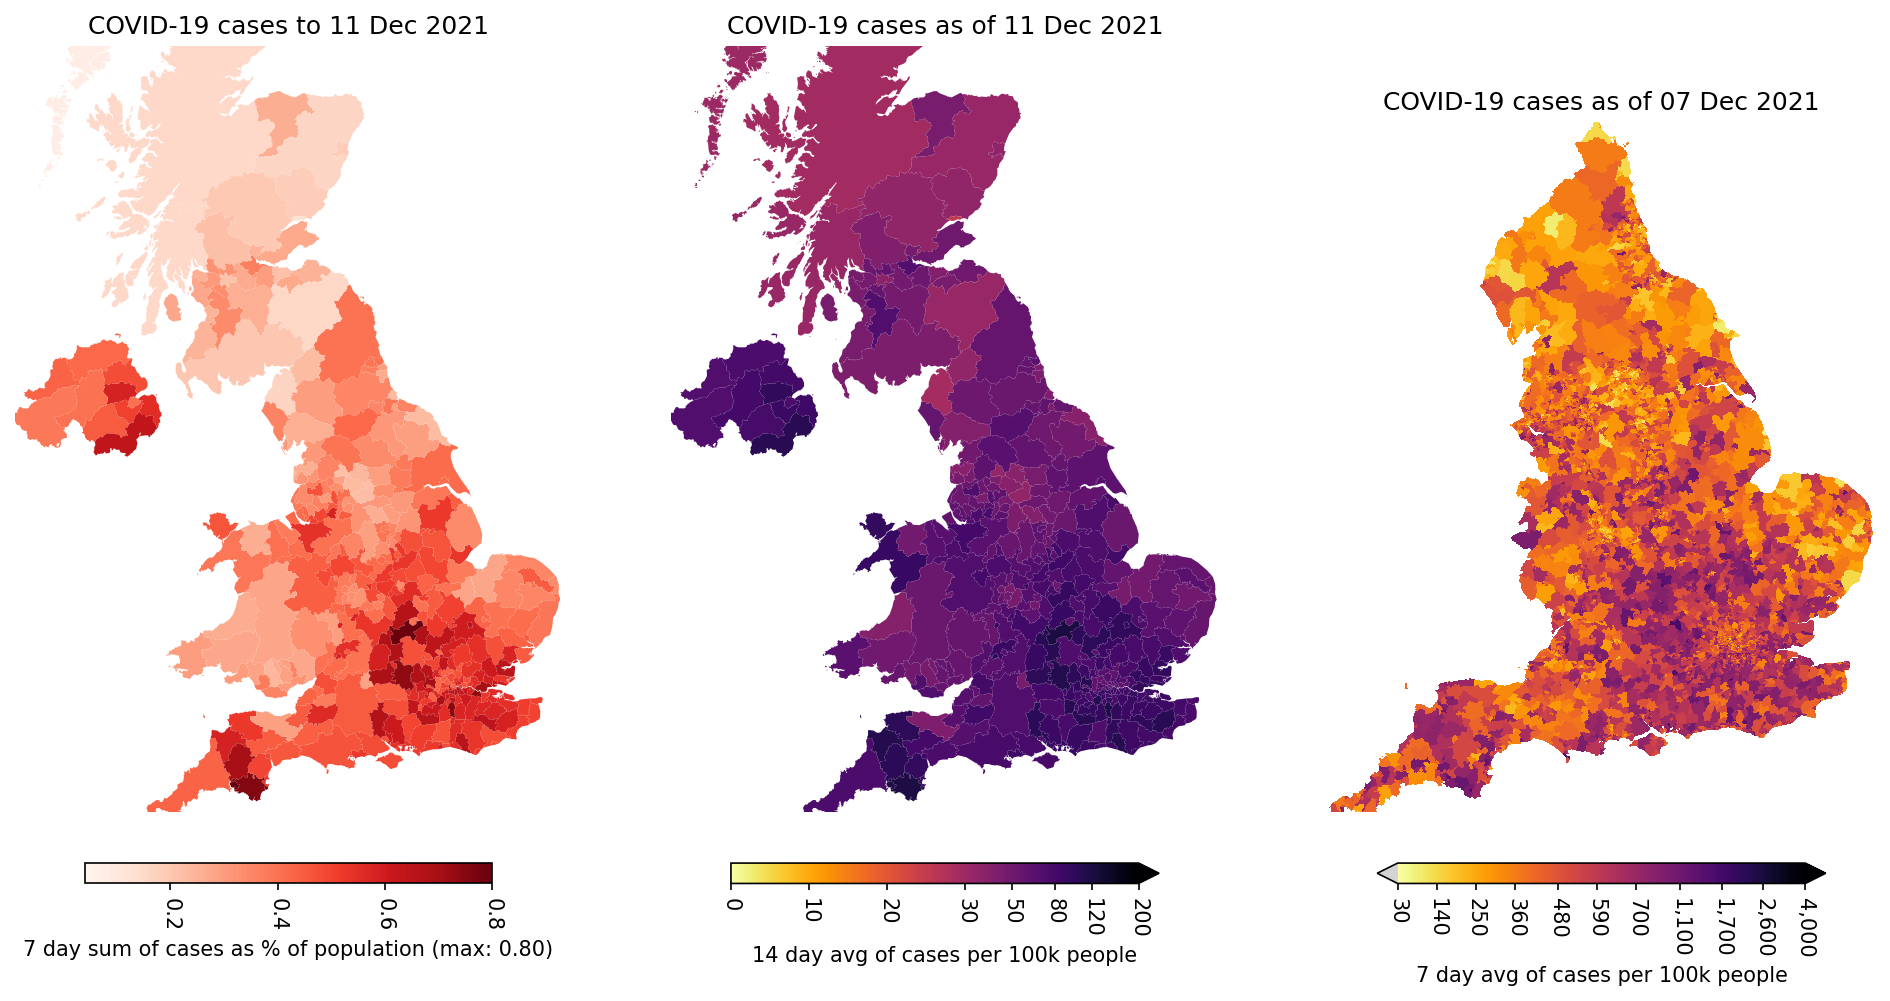

Loading BokehJS ...

In [15]:
case_maps(for_date, sum_vmax=0.8)

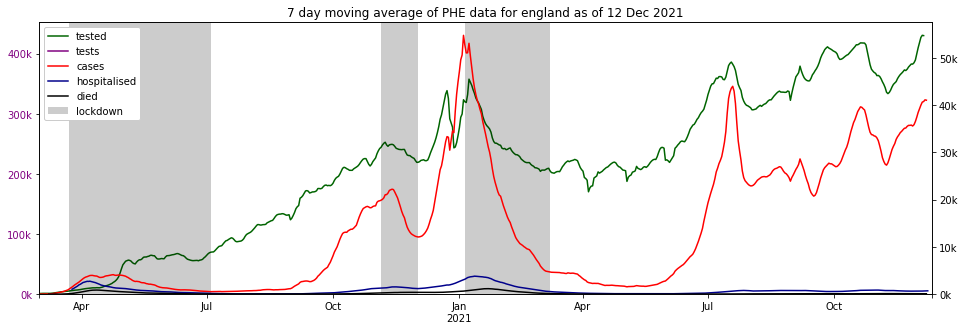

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

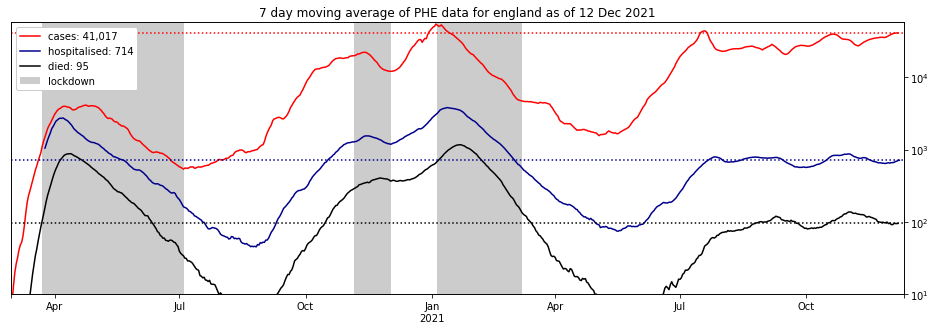

In [17]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))